In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/diamonds-prices/Diamonds Prices2022.csv


In [2]:
diamonds_dataset = pd.read_csv("/kaggle/input/diamonds-prices/Diamonds Prices2022.csv", index_col=0)
display(diamonds_dataset)

carat        cut color clarity  depth  table  price     x     y     z
1       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64
53941   0.71    Premium     E     SI1   60.5   55.0   2756  5.79  5.74  3.49
53942   0.71    Premium     F     SI1   59.8   62.0   2756  5.74  5.73  3.43
53943   0.70  Very Good     E     VS2   60.5   59.0   2757  5.71  5.76  3.47

[53943 rows x 10 columns]

In [3]:
from ydata_profiling import ProfileReport
report = ProfileReport(diamonds_dataset)
report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-o

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

1) Variables $x, y, z$ are highly correclated between each other. 

2) There's also a high correlation between each of $x,y,z$ and carat variable. 

3) Price which is going to be our responce variables (predicted value) has a high correlation with $x,y,z$.

<Axes: xlabel='price', ylabel='Count'>

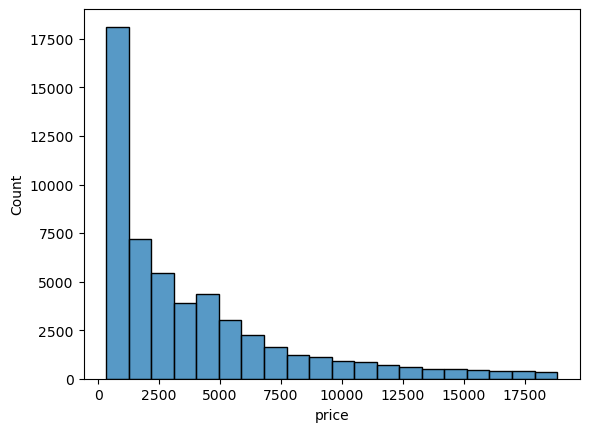

In [21]:
sns.histplot(diamonds_dataset["price"], bins=20)

<Axes: xlabel='carat', ylabel='Count'>

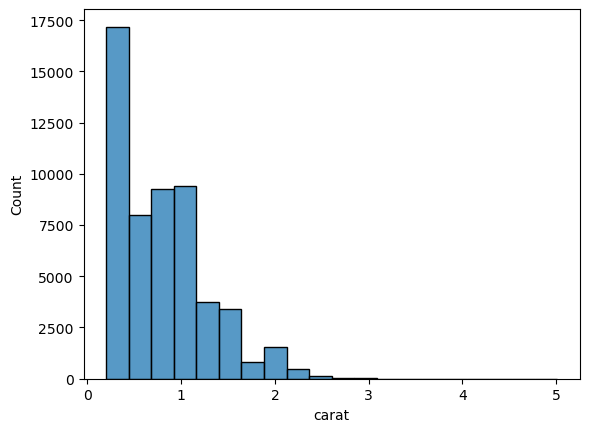

In [22]:
sns.histplot(diamonds_dataset["carat"], bins=20)

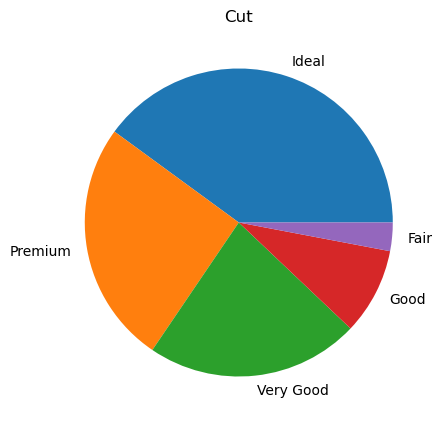

In [32]:
plt.figure(figsize=(5,5))
plt.pie(diamonds_dataset["cut"].value_counts(), labels=["Ideal", "Premium", "Very Good", "Good", "Fair"])
plt.title("Cut")
plt.show()

In [39]:
diamonds_dataset["clarity"].value_counts()

SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

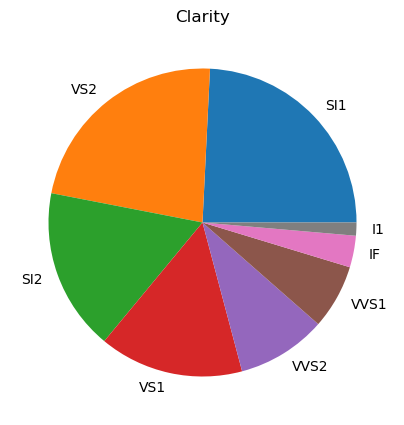

In [40]:
plt.figure(figsize=(5,5))
plt.pie(diamonds_dataset["clarity"].value_counts(), labels=["SI1", "VS2", "SI2", "VS1", "VVS2", "VVS1", "IF", "I1"])
plt.title("Clarity")
plt.show()

In [36]:
diamonds_dataset["color"].value_counts()

G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

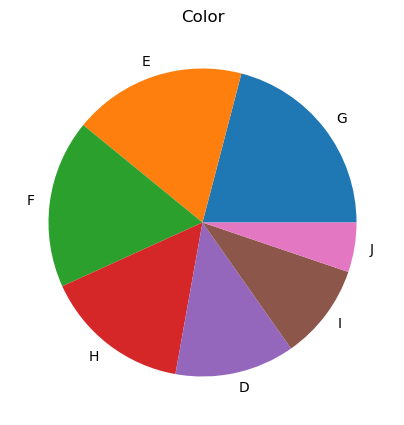

In [38]:
plt.figure(figsize=(5,5))
plt.pie(diamonds_dataset["color"].value_counts(), labels=["G", "E", "F", "H", "D", "I", "J"])
plt.title("Color")
plt.show()

<Axes: xlabel='x', ylabel='price'>

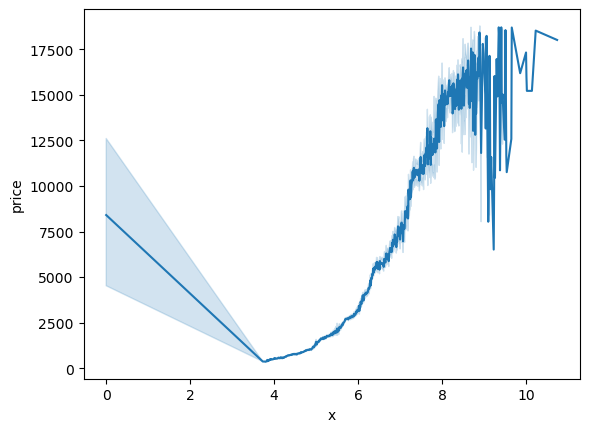

In [24]:
sns.lineplot(data=diamonds_dataset, x="x", y="price")

<Axes: xlabel='carat', ylabel='price'>

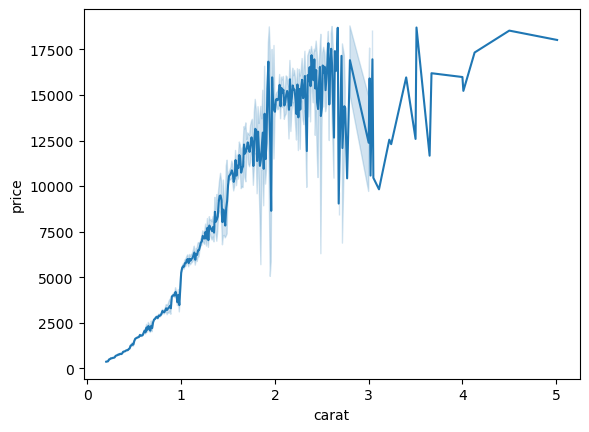

In [25]:
sns.lineplot(data=diamonds_dataset, x="carat", y="price")

In [8]:
import plotly.express as px
fig = px.box(diamonds_dataset, x="cut", y="price")
fig.show()

We can see that on average the most expensive cut is premium and not the ideal. It can be because we have much more examples of ideal cut in the dataset compared to any other cuts. Fair is the second most expensive cut, even though it's the lowest quality cut.

In [9]:
fig = px.box(diamonds_dataset, x="color", y="price")
fig.show()

We can see that on average the most expensive color is "J", which is controversial as "J" is the least expensive color. However, it can be because of other factors as cut or clarity.

In [10]:
fig = px.box(diamonds_dataset, x="clarity", y="price")
fig.show()

We can see that on average the most expensive clarity is SI2 and not the SI1 or VVS1 or IF which are usually more expensive. It can be because of other factors, that influence the price of a diamond.

Diamond color hint: Diamond prices decline or increase in alphabetical order. For example, a diamond with a G color grade is less expensive than a diamond with a D color grade. 

The clarity ranges from the lowest grade: "I1" (included) to the highest grade "IF" (flawless).

VVS1/VVS2 - very very sligtly included.

VS1/VS2 - very sligtly included.

S1/S2 - sligtly included.

Cut variable ranges from "Fair" to "Ideal".




In [11]:
from pandas.api.types import CategoricalDtype

categorical_cut_list = ['Fair','Good','Very Good','Premium','Ideal']
categorical_color_list = ['J', 'I', 'H', 'G', 'F', 'E', 'D']
categorical_clarity_list = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

category_cut = CategoricalDtype(ordered = True, categories = categorical_cut_list)
diamonds_dataset["cut"] = diamonds_dataset["cut"].astype(category_cut)

category_color = CategoricalDtype(ordered = True, categories = categorical_color_list)
diamonds_dataset["color"] = diamonds_dataset["color"].astype(category_color)

category_clarity = CategoricalDtype(ordered = True, categories = categorical_clarity_list)
diamonds_dataset["clarity"] = diamonds_dataset["clarity"].astype(category_clarity)

In [12]:
predictors = ["carat", "cut", "color", "clarity", "x", "y", "z", "table"]
X = pd.get_dummies(data=diamonds_dataset[predictors], columns=["cut", "color", "clarity"])
X = X.drop(columns=["cut_Fair", "color_J", "clarity_I1"])
X.head()

carat     x     y     z  table  cut_Good  cut_Very Good  cut_Premium  \
1   0.23  3.95  3.98  2.43   55.0         0              0            0   
2   0.21  3.89  3.84  2.31   61.0         0              0            1   
3   0.23  4.05  4.07  2.31   65.0         1              0            0   
4   0.29  4.20  4.23  2.63   58.0         0              0            1   
5   0.31  4.34  4.35  2.75   58.0         1              0            0   

   cut_Ideal  color_I  ...  color_F  color_E  color_D  clarity_SI2  \
1          1        0  ...        0        1        0            1   
2          0        0  ...        0        1        0            0   
3          0        0  ...        0        1        0            0   
4          0        1  ...        0        0        0            0   
5          0        0  ...        0        0        0            1   

   clarity_SI1  clarity_VS2  clarity_VS1  clarity_VVS2  clarity_VVS1  \
1            0            0            0             0             0   
2            1            0            0             0             0   
3            0            0            1             0             0   
4            0            1            0             0             0   
5            0            0            0             0             0   

   clarity_IF  
1           0  
2           0  
3           0  
4           0  
5           0  

[5 rows x 22 columns]

Our base cut is going to be "Fair", our base color is going to be color "J" and our base clarity will be "I1". 

Our cut dummy variables are cut_Good, cut_Very Good, cut_Premium, cut_Ideal.

Our color dummy variables are color_D, color_F, color_G, color_H, color_I, color_E.

Our clarity dummy_variables are IF, SI1, SI2, VS1, VS2, VVS1, VVS2.

In [13]:
import statsmodels.api as sm
y=diamonds_dataset["price"]
#add constant to predictor variables so we would have beta_0
Xc = sm.add_constant(X)
# fit linear regression model
model = sm.OLS(y,Xc).fit() 
# view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 2.799e+04
Date:                Mon, 14 Aug 2023   Prob (F-statistic):               0.00
Time:                        01:58:37   Log-Likelihood:            -4.5585e+05
No. Observations:               53943   AIC:                         9.117e+05
Df Residuals:                   53920   BIC:                         9.120e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5342.6247    181.388    -29.454

In [15]:
a = list(zip(model.params[1:], X.columns))
a

[(11121.120337031223, 'carat'),
 (-849.6875841107346, 'x'),
 (33.316038060347644, 'y'),
 (-252.87862230528188, 'z'),
 (-11.798801298601315, 'table'),
 (665.019121055916, 'cut_Good'),
 (851.6974750600432, 'cut_Very Good'),
 (900.2121597498334, 'cut_Premium'),
 (989.1683096940335, 'cut_Ideal'),
 (902.4221182157019, 'color_I'),
 (1387.7292501497645, 'color_H'),
 (1887.1491998829479, 'color_G'),
 (2100.555907424049, 'color_F'),
 (2166.3711226743935, 'color_E'),
 (2374.867472373153, 'color_D'),
 (2719.6859763510356, 'clarity_SI2'),
 (3678.094853334851, 'clarity_SI1'),
 (4286.187671088586, 'clarity_VS2'),
 (4602.890026131519, 'clarity_VS1'),
 (4978.133415681077, 'clarity_VVS2'),
 (5039.189806578371, 'clarity_VVS1'),
 (5385.172540142858, 'clarity_IF')]

Our linear regression model looks like that:
price = -5342.6 + 11121.1\*carat - 849.7\*x + 33.3\*y - 252.9\*z - 11.8\*table + 665\*cut_Good + 851.7\*cut_Very Good + 900.2\*cut_Premium + 989.2\*cut_Ideal  + 2374.9\*color_D + 2166.4\*color_E + 2100.6\*color_F + 1887.1\*color_G + 1387.7\*color_H + 902.4\*color_I + 3678.1\*clarity_SI1 + 2719.7\*clarity_SI2 + 4602.9\*clarity_VS1 + 4286.2\*clarity_VS2 + 5039.2\*clarity_VVS1 + 4978.1\*clarity_VVS2 + 5385.2\*clarity_IF

We can see that when keeping all other factors fixed every carat adds \\$11121 to average price.
Cut "Good" is \\$665 more expensive than "Fair" cut and cut "Very Good" is \\$852 more expensive than "Fair" cut on average. Cut Ideal is the most expensive cut and it's \\$989 more expensive than "Fair" cut on average. When keeping all other factors fixed, clarity "SI2" adds \\$2719.6 to price of clarity "I1" on average. Clarity "SI1" is more expensive than "SI2" and is \\$3678.1 more expensive than clarity "I1". Clarity VS2 and VS1 are more expensive than SI1 and SI2 so it's \\$4286.2 and \\$4602.9 more expensive than clarity "I1".
Clarity "IF" is the most expensive and it adds \\$5385.2 to the price of clarity "I1" on average. 
All coefficients for factors make sense and R-squared = 0.919 shows that linear regression model fits our data pretty well. 



# Regression models

Let's devide into train and test datasets.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xc, y, test_size=0.33, random_state=42)

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
# view model summary
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)

print("R2 score on train", round(lin_reg.score(X_train, y_train), 3))
print("R2 score on test", round(lin_reg.score(X_test, y_test), 3))

R2 score on train 0.919
R2 score on test 0.92


Regression model achieves good r2 score on both train and test datasets. That means that regression model fits the data pretty well.

In [54]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("R2 score on train", round(dt.score(X_train, y_train), 3))
print("R2 score on test", round(dt.score(X_test, y_test), 3))

R2 score on train 1.0
R2 score on test 0.95


In [55]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("R2 score on train", round(rf.score(X_train, y_train), 3))
print("R2 score on test", round(rf.score(X_test, y_test), 3))

R2 score on train 0.996
R2 score on test 0.973


# Model Evaluation

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

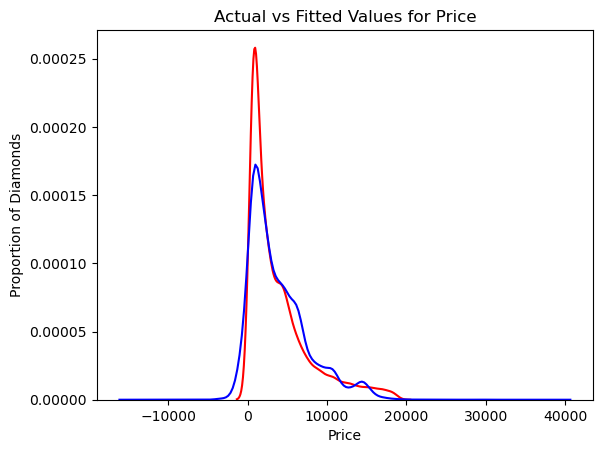

In [62]:
ax = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(lin_reg_pred, color="b", label="Fitted Values", ax=ax)
plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price")
plt.ylabel("Proportion of Diamonds")
plt.show()

In [70]:
print("Linear Regressor RMSE:", np.sqrt(mean_squared_error(y_test, lin_reg_pred)))
print("Linear Regressor Accuracy:", lin_reg.score(X_test, y_test))
print("Linear Regressor MAE:", mean_absolute_error(y_test, lin_reg_pred))

Linear Regressor RMSE: 1114.1514759914126
Linear Regressor Accuracy: 0.9196400471311351
Linear Regressor MAE: 735.8600752395101


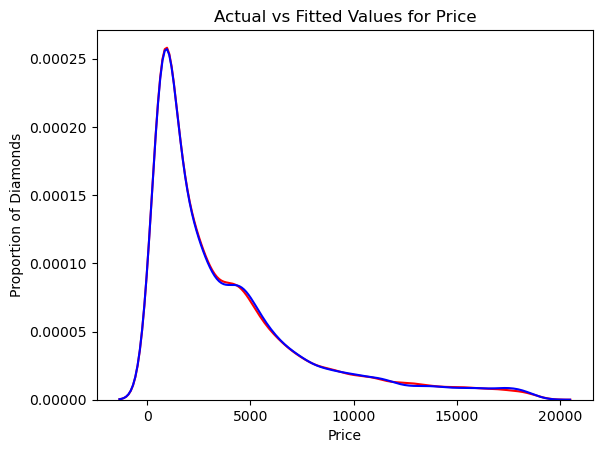

In [63]:
ax = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(dt_pred, color="b", label="Fitted Values", ax=ax)
plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price")
plt.ylabel("Proportion of Diamonds")
plt.show()

In [68]:
print("Decision Tree Regressor RMSE:", np.sqrt(mean_squared_error(y_test, dt_pred)))
print("Decision Tree Regressor Accuracy:", dt.score(X_test, y_test))
print("Decision Tree Regressor MAE:", mean_absolute_error(y_test, dt_pred))

Decision Tree Regressor RMSE: 874.6327628329542
Decision Tree Regressor Accuracy: 0.9504774867889372
Decision Tree Regressor MAE: 399.5898494551174


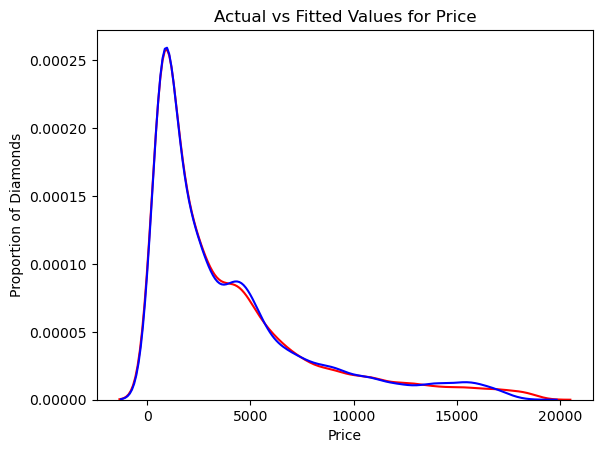

In [64]:
ax = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(rf_pred, color="b", label="Fitted Values", ax=ax)
plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price")
plt.ylabel("Proportion of Diamonds")
plt.show()

In [69]:
print("Random Forest Regressor RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("Random Forest Regressor Accuracy:", rf.score(X_test, y_test))
print("Random Forest Regressor MAE:", mean_absolute_error(y_test, rf_pred))

Random Forest Regressor RMSE: 642.5427814374901
Random Forest Regressor Accuracy: 0.9732726875132288
Random Forest Regressor MAE: 305.9035123122424


### Random Forest Regressor gives the best fit for this regression problem